# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.preprocessing import sequence
from tensorflow.python.keras import Sequential
from keras.models import load_model
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

import pickle

##from Helpers_NN import add_sum_suffix, text_cleanup, reverse_encode, add_one_argmax_score, conf_matrix

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\neural_network_data.csv')

In [3]:
df['rating'] = df['rating'].fillna((df['rating'].mean()))

In [4]:
df['rating'] = df['rating'].astype(np.int64)

In [5]:
df['review'] = df['review'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35563 entries, 0 to 35562
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  35563 non-null  int64 
 1   review  35563 non-null  object
dtypes: int64(1), object(1)
memory usage: 555.8+ KB


# One Hot Encoding Scores Column

In [7]:
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['rating']]).toarray())

df = df.join(enc_df)
df.head()

,rating,review,0,1,2,3,4
0,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


In [8]:
df = df.rename(columns={0: "rating_1", 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})

In [9]:
df.head()

,rating,review,rating_1,rating_2,rating_3,rating_4,rating_5
0,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


# Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df[['review']], 
                                                    df[['rating_1','rating_2','rating_3','rating_4','rating_5']], 
                                                    test_size=.2, 
                                                    random_state=42)

In [11]:
y_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\y_test_neural.csv',index=False)

In [12]:
x_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\x_test_neural.csv')

In [13]:
y_train.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\y_train_neural.csv')
x_train.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\x_train_neural.csv')

# Add Suffix to the Review Summary to Distinguish the Difference

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')


def add_sum_suffix(text):
    
    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        word = word + '_sum'
        new_text += word + ' '
        
    return new_text

In [15]:
x_train['review_suffixed'] = x_train['review'].apply(add_sum_suffix)
x_test['review_suffixed'] = x_test['review'].apply(add_sum_suffix)

In [16]:
x_train.head()

,review,review_suffixed
4851,Hotel is what it is. Clean and functional and ...,hotel_sum is_sum what_sum it_sum is_sum clean_...
1087,Just checked in for a 4 day trip to London (Bu...,just_sum checked_sum in_sum for_sum a_sum day_...
5865,We don’t usually report on major chain hotels ...,we_sum don_sum t_sum usually_sum report_sum on...
29083,money grabbing charge credit card checkin chec...,money_sum grabbing_sum charge_sum credit_sum c...
3954,"OK hotel, but with the Hilton brand you would ...",ok_sum hotel_sum but_sum with_sum the_sum hilt...


#  Removing Punctuation and Tokenizing Review Column

In [17]:
def text_cleanup(text):
    
    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        new_text += word + ' '
        
    return new_text

In [18]:
x_train['review_cleaned'] = x_train['review'].apply(text_cleanup)
x_test['review_cleaned'] = x_test['review'].apply(text_cleanup)

In [19]:
x_train.head()

,review,review_suffixed,review_cleaned
4851,Hotel is what it is. Clean and functional and ...,hotel_sum is_sum what_sum it_sum is_sum clean_...,hotel is what it is clean and functional and f...
1087,Just checked in for a 4 day trip to London (Bu...,just_sum checked_sum in_sum for_sum a_sum day_...,just checked in for a day trip to london busin...
5865,We don’t usually report on major chain hotels ...,we_sum don_sum t_sum usually_sum report_sum on...,we don t usually report on major chain hotels ...
29083,money grabbing charge credit card checkin chec...,money_sum grabbing_sum charge_sum credit_sum c...,money grabbing charge credit card checkin chec...
3954,"OK hotel, but with the Hilton brand you would ...",ok_sum hotel_sum but_sum with_sum the_sum hilt...,ok hotel but with the hilton brand you would e...


# Creating a Dictionary With Words That Appear in Reviews and an Index

In [20]:
flat_review = " ".join(x_train['review_cleaned'].values)
flat_review = flat_review.lower().split()

In [21]:
len(flat_review)

2985169

In [22]:
flat_review = " ".join(x_train['review_suffixed'].values)
flat_review = flat_review.lower().split()

In [23]:
unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)

In [24]:
len(unique_list)

48179

In [25]:
word_index_dict = {}
for i in range(0,len(unique_list)):
    word_index_dict[unique_list[i]] = i

In [26]:
word_index_dict = {k:(v+4) for k,v in word_index_dict.items()}
word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2
word_index_dict['<UNUSED>'] = 3

# Indexing Words in Reviews Using Dictionary

In [27]:
def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list 

In [28]:
x_train['preprocessed_review'] = x_train['review_cleaned'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_cleaned'].apply(index_review_words)

In [29]:
x_train['preprocessed_review'] = x_train['review_suffixed'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_suffixed'].apply(index_review_words)

In [30]:
x_train.head()

,review,review_suffixed,review_cleaned,preprocessed_review
4851,Hotel is what it is. Clean and functional and ...,hotel_sum is_sum what_sum it_sum is_sum clean_...,hotel is what it is clean and functional and f...,"[4, 5, 6, 7, 5, 8, 9, 10, 9, 11, 12, 13, 14, 1..."
1087,Just checked in for a 4 day trip to London (Bu...,just_sum checked_sum in_sum for_sum a_sum day_...,just checked in for a day trip to london busin...,"[81, 82, 83, 11, 19, 31, 84, 35, 73, 85, 86, 8..."
5865,We don’t usually report on major chain hotels ...,we_sum don_sum t_sum usually_sum report_sum on...,we don t usually report on major chain hotels ...,"[33, 153, 111, 154, 155, 29, 156, 157, 93, 83,..."
29083,money grabbing charge credit card checkin chec...,money_sum grabbing_sum charge_sum credit_sum c...,money grabbing charge credit card checkin chec...,"[216, 217, 218, 219, 220, 221, 222, 39, 223, 2..."
3954,"OK hotel, but with the Hilton brand you would ...",ok_sum hotel_sum but_sum with_sum the_sum hilt...,ok hotel but with the hilton brand you would e...,"[257, 4, 67, 59, 12, 88, 258, 140, 259, 149, 2..."


# 5.8 Combining Indexed Review Summary and Indexed Review Into a Single Column Called All Preprocessed Review

In [31]:
from keras import preprocessing
import keras
from keras.utils import pad_sequences

In [32]:
from keras_preprocessing.sequence import pad_sequences

In [33]:
x_train = pad_sequences(x_train['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)
x_test = pad_sequences(x_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)

In [34]:
np.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks\/x_test',x_test)

In [35]:
x_train.shape

(28450, 250)

In [36]:
y_train.shape

(28450, 5)

In [37]:
x_test.shape

(7113, 250)

In [38]:
y_test.shape


(7113, 5)

In [53]:
model = Sequential()
model.add(Embedding(48179,5))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.2,random_state=42)

In [56]:
fitModel = model.fit(x_train, y_train, epochs=60, batch_size=250, validation_data=(x_val,y_val), verbose=0)

In [57]:
model.evaluate(x_val,y_val)

143/143 [==============================] - 0s 872us/step - loss: 1.0035 - accuracy: 0.6338


[1.0034526586532593, 0.6337873339653015]

In [58]:
model.evaluate(x_test,y_test)

223/223 [==============================] - 0s 839us/step - loss: 1.0095 - accuracy: 0.6393


[1.009533166885376, 0.6392520666122437]

In [59]:
def reverse_encode(y_df):

    y_df['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
    for i in range(0,len(y_df)):
        if y_df.iloc[i,-1] == 'score_1':
            y_df.iloc[i,-1] = 1
        elif y_df.iloc[i,-1] == 'score_2':
            y_df.iloc[i,-1] = 2
        elif y_df.iloc[i,-1]== 'score_3':
            y_df.iloc[i,-1] = 3
        elif y_df.iloc[i,-1]== 'score_4':
            y_df.iloc[i,-1] = 4
        elif y_df.iloc[i,-1] == 'score_5':
            y_df.iloc[i,-1]= 5

In [60]:
reverse_encode(y_test)

In [61]:
reverse_encode(y_val)

In [63]:
def add_one_argmax_score(x):

    x = x+1

    return x

In [64]:
y_test_predicted = add_one_argmax_score(np.argmax(model.predict(x_test),axis=1))

In [95]:
y_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/y_test_nn_df.csv',index=False)
np.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/y_test_predicted_array',y_test_predicted)

In [78]:
y_test['score']

17346    rating_4
8135     rating_5
8904     rating_5
14918    rating_5
14265    rating_5
           ...   
18238    rating_5
18699    rating_4
18348    rating_4
29677    rating_1
4148     rating_3
Name: score, Length: 7113, dtype: object

In [84]:
y_test['score'] = y_test['score'].replace(['rating_1'],1)
y_test['score'] = y_test['score'].replace(['rating_2'],2)
y_test['score'] = y_test['score'].replace(['rating_3'],3)
y_test['score'] = y_test['score'].replace(['rating_4'],4)
y_test['score'] = y_test['score'].replace(['rating_5'],5)

In [91]:
y_test['score'] = y_test['score'].astype(np.int64)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12908\4074230424.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test['score'] = y_test['score'].astype(np.int)


In [92]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])
    ax.set(xlabel='Predicted', ylabel='True')
    plt.show()

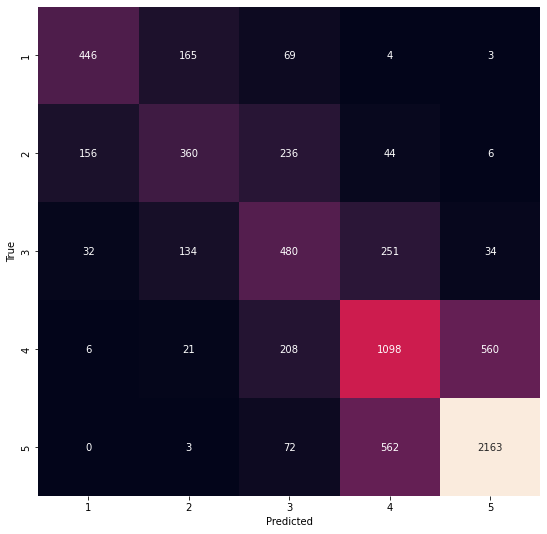

In [93]:
test_cm = confusion_matrix(y_test['score'], y_test_predicted)
conf_matrix(test_cm)

In [96]:
model.save(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/Models/Neural_Network.h5')

In [98]:
pickle.dump(word_index_dict,open(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Neural_Networks/word_index_dict.pkl','wb'))